# Churn Biblioteca

## Importando bibliotecas

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

## Importando dados

In [98]:
churn_biblioteca = pd.read_csv('Datasets/churn_biblioteca.csv',sep=';')
churn_biblioteca

,nivel_matricula,institutos,visitou_biblioteca,fez_emprestimo,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn
0,Docência,Física,0,0,0,0,0,3.0,2.0,1.0,3.0,1.0,sim
1,Pós-graduação,Artes,0,0,0,0,0,1.0,0.0,4.0,2.0,1.0,sim
2,Pós-graduação,Artes,0,0,0,0,0,2.0,1.0,2.0,3.0,1.0,sim
3,Docência,Artes,0,0,0,0,0,3.0,1.0,2.0,3.0,0.0,sim
4,Docência,Física,0,0,0,0,0,2.0,2.0,4.0,5.0,3.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Graduação,Biologia,1,0,1,0,0,3.0,2.0,5.0,3.0,0.0,não
17996,Pós-graduação,Física,0,1,1,0,0,1.0,5.0,3.0,5.0,0.0,não
17997,Graduação,Geociências,0,0,0,0,1,4.0,1.0,3.0,3.0,2.0,não
17998,Pós-graduação,Biologia,0,0,0,1,0,4.0,1.0,4.0,2.0,2.0,não


## Análise exploratória

In [119]:
churn_biblioteca_sim = churn_biblioteca.query('churn == "sim"')
churn_biblioteca_nao = churn_biblioteca.query('churn == "não"')

In [99]:
def tabela_freq(variavel):
    
    freq_percent = churn_biblioteca[variavel].value_counts(normalize=True).round(2).reset_index()
    freq_percent.columns = [variavel,'percentual']
    return freq_percent

### Nível Matrícula

In [100]:
churn_biblioteca.nivel_matricula.value_counts(normalize=True).round(2)

Graduação        0.45
Pós-graduação    0.45
Docência         0.10
Name: nivel_matricula, dtype: float64

In [120]:
churn_biblioteca_sim.nivel_matricula.value_counts(normalize=True).round(2)

Pós-graduação    0.46
Graduação        0.44
Docência         0.10
Name: nivel_matricula, dtype: float64

In [121]:
churn_biblioteca_nao.nivel_matricula.value_counts(normalize=True).round(2)

Graduação        0.45
Pós-graduação    0.45
Docência         0.10
Name: nivel_matricula, dtype: float64

In [101]:
churn_biblioteca.columns

Index(['nivel_matricula', 'institutos', 'visitou_biblioteca', 'fez_emprestimo',
       'visitou_biblioteca_digital', 'visitou_evento', 'consultou_biblioteca',
       'nota_emprestimo', 'nota_evento', 'nota_infraestrutura', 'nota_acervo',
       'nota_redes_sociais', 'churn'],
      dtype='object')

In [116]:
churn_biblioteca_notas = churn_biblioteca.iloc[:,7:12]
churn_biblioteca_notas.describe().loc[['mean','std']].round(2)

,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais
mean,2.91,2.47,3.22,3.77,2.09
std,1.39,1.04,1.35,1.21,1.65


In [103]:
tabela_freq('nota_emprestimo')

,nota_emprestimo,percentual
0,3.0,0.26
1,2.0,0.22
2,4.0,0.21
3,5.0,0.15
4,1.0,0.11
5,0.0,0.05


Text(0.5, 1.1, 'Distribuição da Nota de empréstimo')

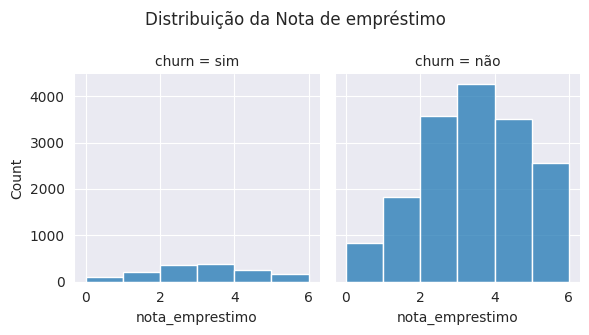

In [92]:
# Cria gráficos de densidade para cada variável
g = sns.FacetGrid(churn_biblioteca, col="churn")
g.map(sns.histplot, "nota_emprestimo", bins=5, binwidth=1, binrange=(0, 6))

g.fig.suptitle('Distribuição da Nota de empréstimo',y=1.1)
